# Neste script vamos adicionar mapas utilizando a biblioteca Cartopy. Para isto, precisamos importar a biblioteca, definir a projeção "Plate Carree" (como a Cartopy chama a projeção cilindrica equidistante), definir a região e chamar as instruções que adicionam os mapas.

Init: 2021-07-16 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-07-16 00:00:00 UTC


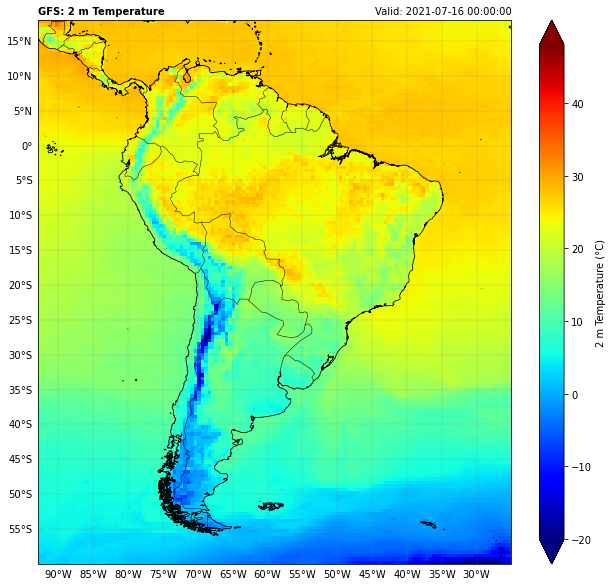

In [1]:
#-----------------------------------------------------------------------------------------------------------
# Curso INPE / CPTEC Training: NWP Data Processing With Python - Script 4: Adding a Map with Cartopy 
# Instrutor: Diego Souza
# Adaptado: Dejanira F Braz
#-----------------------------------------------------------------------------------------------------------
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt      # Plotting library
import cartopy, cartopy.crs as ccrs  # Plot maps
import numpy as np                   # Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")
 
# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file    
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent [min. lon, max. lon, min. lat, max. lat]
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-20, vmax=48, cmap='jet')

# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Figure/image_4.png')

# Show the image
plt.show()